# A3-Q3: Time of Death

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from copy import deepcopy

## (a) Dynamics Function

In [2]:
# === YOUR CODE HERE ===
def T_a(t):
    '''
    returns the temperature based on t
    '''
    if 0 <= t and t <= 7:
        return 16
    elif 7 < t and t <= 7.5:
        return 16 + 12 * (t - 7)
    elif 7.5 < t and t <= 19:
        return 22
    elif 19 < t and t <= 21:
        return 79 - 3 * t
    elif 21 < t and t <= 23.25:
        return 16

def dynamic(t, z):
    '''
    Returns dz/dt based on t and z
    '''
    dzdt = np.zeros_like(z)
    
    # get dz[0]/dt
    if 29 <= z[2] and z[2] <= 45:
        dzdt[0] = 0.0008 * ((z[2] - 29) ** 2) * (1 - np.e ** (0.08 * (z[2] - 45))) * z[0] * (30 - z[0])
    else:
        dzdt[0] = 0
        
    # get dz[1]/dt
    if 17 <= z[2] and z[2] <= 32:
        dzdt[1] = 0.001 * ((z[2] - 17) ** 2) * (1 - np.e ** (0.05 * (z[2] - 32))) * z[1] * (20 - z[1])
    else:
        dzdt[1] = 0
        
    # get dz[2]/dt
    dzdt[2] = -0.1 * (z[2] - T_a(t)) + (z[0] + z[1]) / 100
    
    
    return dzdt


# get the initial state variable
z_0 = np.array([1, 1, 37.5])




## (b) Run the simulation

In [5]:
# === YOUR CODE HERE ===
def MyOde(f, tspan, y0, h, event=(lambda t,y:1)):
    '''
     t,y = MyOde(f, tspan, y0, h, event=[])
    
     Numerically solves the initial value problem
    
        dy(t)/dt = f(t,y)
            y(0) = y0
    
     using the Modified Euler time-stepping method.
    
     Input
       f       a Python dynamics function with calling sequence
                  dydt = f(t, y)
       tspan   2-tuple giving the start and end times, [start, end]
       y0      initial state of the system (as a 1D vector)
       h       the time step to use (this is not adaptive time stepping)
       events  an event function with calling sequence
                  val = events(t, y)
               The computation stops as soon as a negative value is
               returned by the event function.
    
     Output
       t       1D vector holding time stamps
       y       an array that holds one state vector per row (corresponding
               to the time stamps)
    
       Notes:
           - t and y have the same number of rows.
    
           - The first element of t should be tspan[0], and the first
             row of y should be the initial state, y0.
    
           - If the computation was stopped by the triggering of an event,
             then the last row of t and y should correspond to the
             time that linear interpolation indicates for the zero-crossing
             of the event-function.
    '''

    # Initialize output arrays, tlst and ylst
    t = tspan[0]
    y = deepcopy(y0)
    
    tlst = []
    ylst = []
    
    tlst.append(t)                # append the first t-value
    ylst.append(y)      # append the initial state
    
    # === YOUR CODE HERE ===
    while t + h <= tspan[-1]:   # terminates when t + h is not in tspan
        y_0 = ylst[-1]    # the last presently existed y
        t_0 = tlst[-1]    # the last presently existed t
        
        # implement Euler's method first
        y_e_1 = y_0 + h * f(t_0, y_0)
        
        # get the f at t and at the new point
        f_0 = f(t_0, y_0)        # f value at t
        f_1 = f(t + h, y_e_1)      # f value at the new t
        new_f = (f_0 + f_1) / 2    # take the average of the f value at t and the new t
        y_m_1 = y_0 + h * new_f    # finish this step of modified Euler's method
    
            
        # check the event
        this_evt = event(t + h, y_m_1)
        if this_evt < 0:    # the event indicates the termination of the process
            # get the linear interpolation function across the last 2 (event, t) coordinates
            last_evt = event(tlst[-1], ylst[-1])
            Event_itpl = interpolate.interp1d(x = [this_evt, last_evt], y = [t + h, tlst[-1]], kind = "linear")
            app_t = Event_itpl(0)  # the approximated last t value
        
            # implement the last modified Euler's method using the approximated last t value       
            y_0 = ylst[-1]
            t_0 = tlst[-1]
            h_alt = app_t - t_0
            y_e_1 = y_0 + h_alt * f(t_0, y_0)
            f_0 = f(t_0, y_0)
            f_1 = f(app_t, y_e_1)
            new_f = (f_0 + f_1) / 2
            y_m_1 = y_0 + h_alt * new_f
            tlst.append(app_t)
            ylst.append(y_m_1)
            
            break
        else:
            tlst.append(t + h)
            ylst.append(y_m_1)
        
        t += h    
    
    return np.array(tlst), np.array(ylst)


# I think the person dies at 11:00am on June 12
t, y = MyOde(dynamic, [11.00, 23.25], z_0, 0.1)

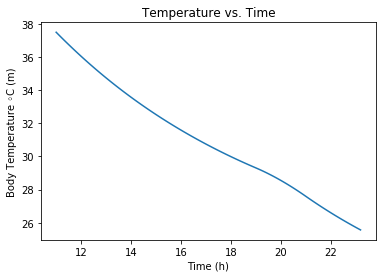

In [8]:
# Plot temperature, and display final state
# Temperature vs. time:
plt.title(r'Temperature vs. Time');
plt.xlabel('Time (h)')
plt.ylabel('Body Temperature (◦C)');
idx = 0
Tem = []
length_y = len(y)
while idx < length_y:
    Tem.append(y[idx][2])
    idx += 1
plt.plot(t, np.array(Tem))

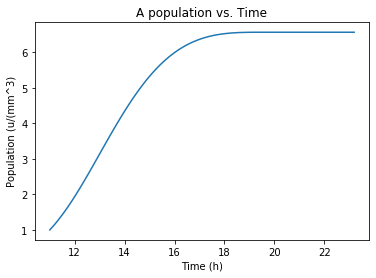

In [9]:
# Final state
plt.title(r'A population vs. Time');
plt.xlabel('Time (h)')
plt.ylabel('Population (u/(mm^3)');
idx = 0
Tem = []
length_y = len(y)
while idx < length_y:
    Tem.append(y[idx][0])
    idx += 1
plt.plot(t, np.array(Tem))

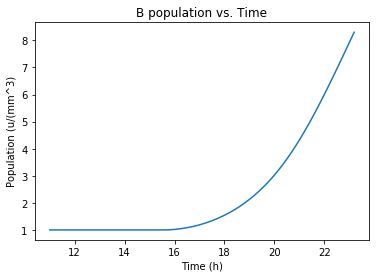

In [10]:
# Final state
plt.title(r'B population vs. Time');
plt.xlabel('Time (h)')
plt.ylabel('Population (u/(mm^3)');
idx = 0
Tem = []
length_y = len(y)
while idx < length_y:
    Tem.append(y[idx][1])
    idx += 1
plt.plot(t, np.array(Tem))

## (c) Prime Suspect

In [13]:
# try all unconfirmed duration of each suspect and fidn if the unconfirmed duration is coincide with the murder
DRU = 11.5
t, y = MyOde(dynamic, [DRU, 23.25], z_0, 0.1)
print(y[-1])

SBU = 14.0
t, y = MyOde(dynamic, [SBU, 23.25], z_0, 0.1)
print(y[-1])

JCU = 9.5
t, y = MyOde(dynamic, [JCU, 23.25], z_0, 0.1)
print(y[-1])

[ 6.56026522  7.33463278 25.75573928]
[ 6.44759425  3.64542162 26.95427957]
[ 6.56128322 11.36972951 25.06728889]


YOUR ANSWER HERE\
I think James Carver murdered the person during 9:00 and 10:30 on Jun 12 due to the computation result.